In deze opgave classificeren afbeeldingen van bloemen uit de iris dataset met behulp van een neuraal netwerk.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.datasets import mnist


Laad de dataset en maak een feature matrix X en een target vector y.

In [4]:
iris = sns.load_dataset('iris')

# we gebruiken .values om een Numpy array te krijgen in plaats van een Pandas DataFrame
X_iris = iris.drop('species', axis=1).values 
y_iris = iris['species'].values

In [5]:
y_iris = y_iris.reshape(-1, 1) # maak een array van array's, dit is nodig voor de volgende stap
print(y_iris[:10])

[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


Een neuraal netwerk kan niet omgaan met categorische labels zoals de namen van de planten, maar heeft getallen als uitput nodig. We hebben hier drie klassen (setosa, versicolor, virginica) daarom maken we een target vector met per label drie waarden. Een 1 voor de eerste waarde correspondeert met 'setosa', een 1 voor de 2e waade met 'versicolor' en een 1 voor de derde waarde met 'virginica'.

Doe dit met behulp van het `OneHotEncoder` object uit sklearn.

In [10]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the labels
y_iris_encoded = encoder.fit_transform(y_iris)

print(y_iris_encoded[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


We hebben de data nu in een geschikt formaat. Splits de data in training en test data.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris_encoded, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(120, 4) (30, 4)
(120, 3) (30, 3)


Maak een eenvoudig neuraal netwerk met 3 lagen, waarin elke neuron in een laag met elk neuron in de vorige laag verbonden is ('Dense'). 
Voeg voor de eeste laag een parameter `input_shape` toe die aangeeft hoeveel features een element in 'X' heeft.
Het aantal neuronen in de laaste laag is gelijk aan het aantal waarden in een label in `y`. 

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# Add the first layer with input_shape
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))

# Add the second hidden layer
model.add(Dense(64, activation='relu'))

# Add the output layer with the number of neurons equal to the number of classes
model.add(Dense(y_train.shape[1], activation='softmax'))

C:\Users\Pascal\Desktop\Projects\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compileer en bekijk het netwerk door onderstaande code te runnen.

In [14]:
from keras.optimizers import Adam

model.compile(Adam(learning_rate=0.01), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

Nu kunnen we ons model trainen met behulp van de `fit` methode.

In [15]:
model.fit(X_train, y_train, epochs = 25, batch_size = 5)

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5040 - loss: 0.9887
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.7521 - loss: 0.4226
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8253 - loss: 0.3722
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9296 - loss: 0.2225
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8978 - loss: 0.2408
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9607 - loss: 0.1033
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9637 - loss: 0.1131
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9739 - loss: 0.0738
Epoch 9/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9239 - loss: 0.1894
Epoch 10/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9615 - loss: 0.1520
Epoch 11/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9360 - loss: 0.1153
Epoch 12/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8633 

Met `model_evaluate` kunnen we bepalen hoe goed het model werkt op de test data.

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9333 - loss: 0.1854
0.9333333373069763


Experimenteer met bovenstaand model. Wat gebeurt er als je meer lagen toevoegt of een laag weghaalt of het aantal neuronen in een laag verandert? 

Probeer ook eens andere activatiefuncties dan `relu`, zoals `tanh` of `sigmoid`.

Welke invloed heeft het aantal epochs?

Training model with 2 layers, 512 neurons, activation: relu, epochs: 5


C:\Users\Pascal\Desktop\Projects\env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


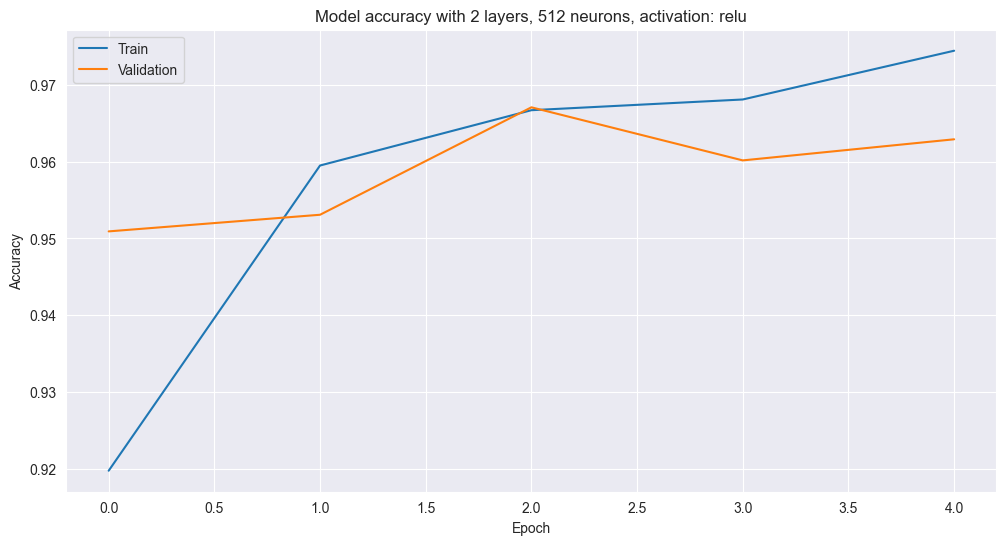

Test Loss: 0.14058029651641846
Test Accuracy: 0.9657999873161316
Training model with 3 layers, 256 neurons, activation: tanh, epochs: 10


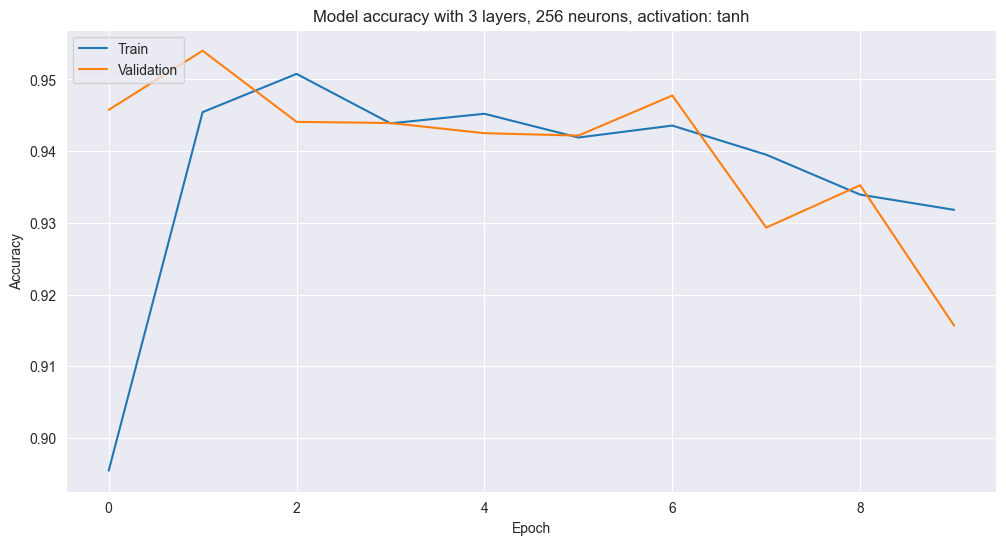

Test Loss: 0.31759193539619446
Test Accuracy: 0.9096999764442444
Training model with 4 layers, 128 neurons, activation: sigmoid, epochs: 15


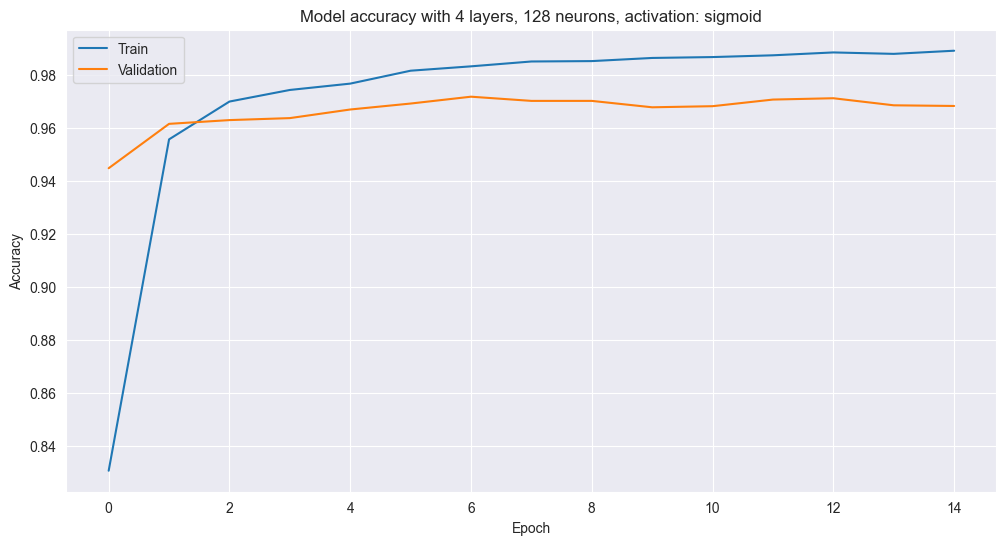

Test Loss: 0.11909271031618118
Test Accuracy: 0.9689000248908997


In [17]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def create_model(layers, neurons, activation):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(28 * 28,), activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), 'categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different configurations
configurations = [
    {'layers': 2, 'neurons': 512, 'activation': 'relu', 'epochs': 5},
    {'layers': 3, 'neurons': 256, 'activation': 'tanh', 'epochs': 10},
    {'layers': 4, 'neurons': 128, 'activation': 'sigmoid', 'epochs': 15},
]

for config in configurations:
    print(f"Training model with {config['layers']} layers, {config['neurons']} neurons, activation: {config['activation']}, epochs: {config['epochs']}")
    model = create_model(config['layers'], config['neurons'], config['activation'])
    history = model.fit(train_images, train_labels, epochs=config['epochs'], batch_size=128, validation_split=0.2, verbose=0)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Model accuracy with {config['layers']} layers, {config['neurons']} neurons, activation: {config['activation']}")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_acc}")

We kunnen dezelfde aanpak gebruiken voor andere data, bijvoorbeeld voor het herkennen van cijfers. We gebruiken de `MNist` dataset die bestaat uit plaatjes van cijfers. Ieder plaatje bestaat uit 28 x 28 pixels.

In [19]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

import warnings
warnings.filterwarnings('ignore')

In [20]:
train_images.shape

(60000, 28, 28)

In [21]:
len(train_labels)

60000

In [22]:
print(train_labels)

[5 0 4 ... 5 6 8]


Een eenvoudig neuraal netwerk heeft een array van inputwaarden nodig i.p.v. een 2D afbeelding.
We maken van de inputs (waarden tussen 0 en 255) getallen tussen 0 en 1.

In [23]:
train_images = train_images.reshape((60000, 28 * 28)) # lijst van waarden i.p.v. 2D afbeelding
train_images = train_images.astype('float32') / 255 # getallen tussen 0 en 1

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Voor elk label (een cijfer) maken we een array met 10 waarden: 9 nullen en een één, waarbij de positie van de één aangeeft om welk cijfer het gaat (One hot encoding). Dit keer gebruiken we hiervoor de `keras` functie `to_categorical`.

In [24]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Maak nu een neuraal netwerk met twee lagen, een eerste laag met 512 neuronen en een output laag met 10 neuronen. Geef bij de eerste laag aan hoeveel inputs er zijn en wat de activatiefunctie is. De output laag heeft een `softmax` activatiefunctie.

In [25]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(512, input_shape=(28 * 28,), activation='relu'))


model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

compileer het netwerk.

In [26]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

train het netwerk 5 epochs met een batch_size van 128.

In [27]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.8737 - loss: 0.4388
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9663 - loss: 0.1136
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9789 - loss: 0.0707
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9846 - loss: 0.0510
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9891 - loss: 0.0363


Evalueer het netwerk op de test set.

In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9756 - loss: 0.0752
Test Loss: 0.06414050608873367
Test Accuracy: 0.9789000153541565


Experimenteer met verschillende netwerken. Varieer het aantal lagen, het aantal neuronen, de activatiefunties en het aantal epochs.

Training model with 2 layers, 512 neurons, activation: relu, epochs: 5


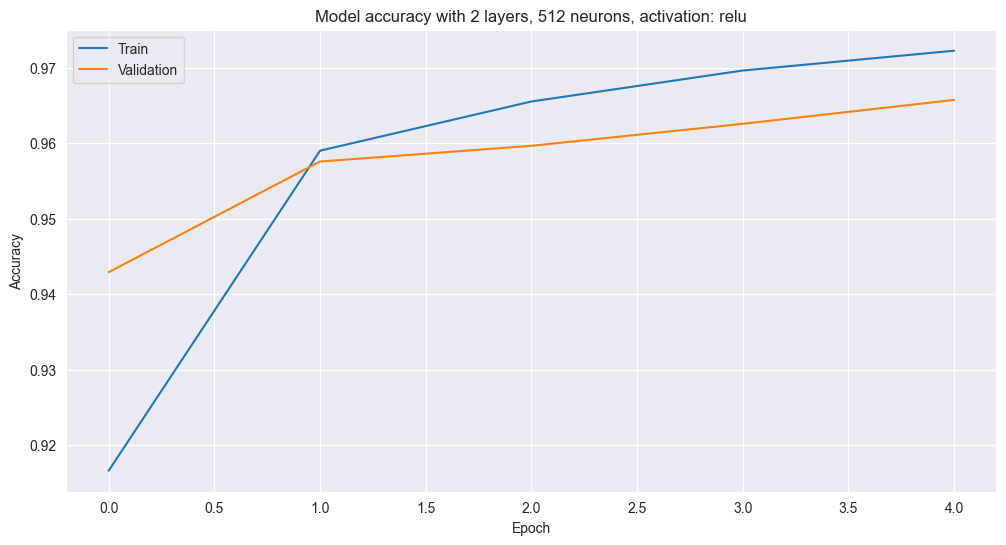

Test Loss: 0.15917250514030457
Test Accuracy: 0.9624999761581421
Training model with 3 layers, 256 neurons, activation: tanh, epochs: 10


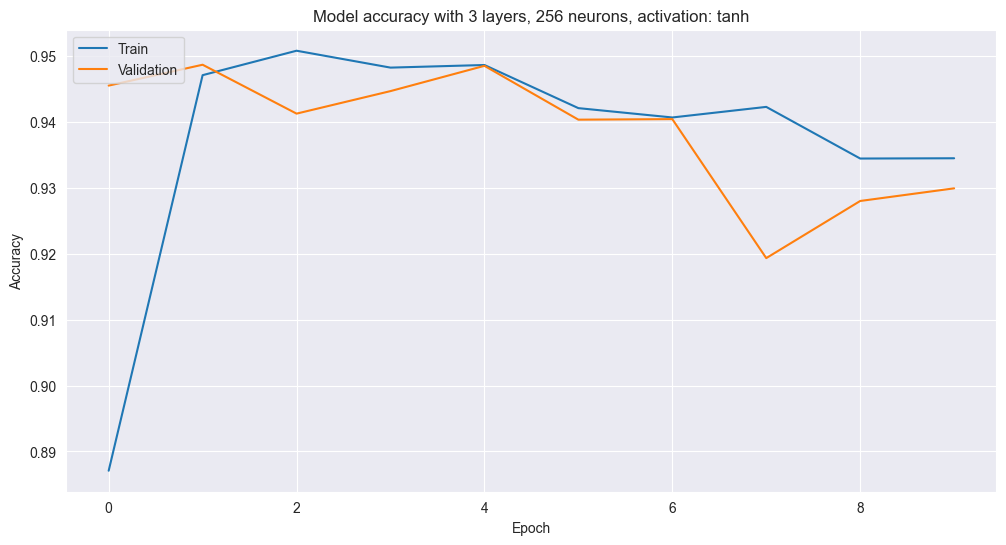

Test Loss: 0.2599699795246124
Test Accuracy: 0.9271000027656555
Training model with 4 layers, 128 neurons, activation: sigmoid, epochs: 15


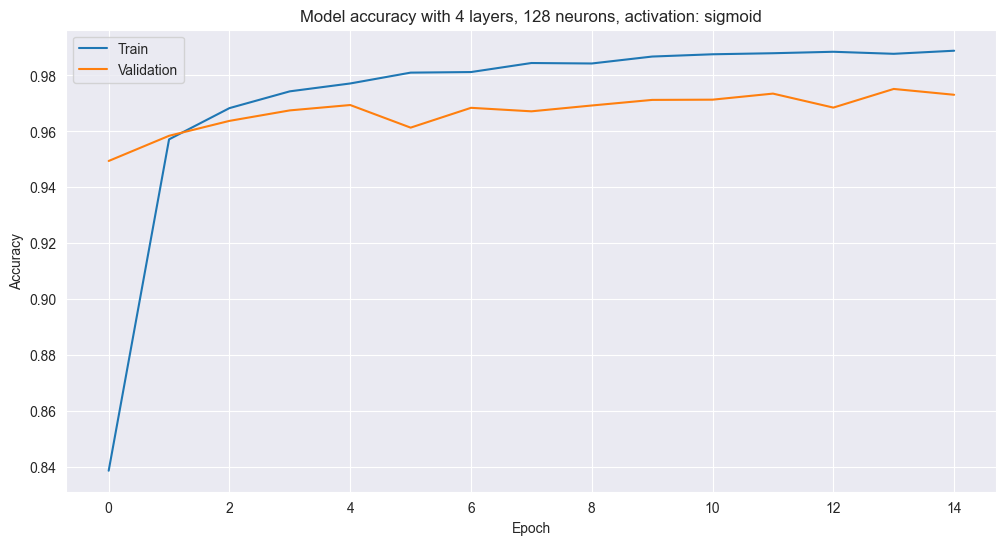

Test Loss: 0.12128737568855286
Test Accuracy: 0.9711999893188477


In [29]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

def create_model(layers, neurons, activation):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(28 * 28,), activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))
    model.compile(Adam(learning_rate=0.01), 'categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different configurations
configurations = [
    {'layers': 2, 'neurons': 512, 'activation': 'relu', 'epochs': 5},
    {'layers': 3, 'neurons': 256, 'activation': 'tanh', 'epochs': 10},
    {'layers': 4, 'neurons': 128, 'activation': 'sigmoid', 'epochs': 15},
]

for config in configurations:
    print(f"Training model with {config['layers']} layers, {config['neurons']} neurons, activation: {config['activation']}, epochs: {config['epochs']}")
    model = create_model(config['layers'], config['neurons'], config['activation'])
    history = model.fit(train_images, train_labels, epochs=config['epochs'], batch_size=128, validation_split=0.2, verbose=0)

    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f"Model accuracy with {config['layers']} layers, {config['neurons']} neurons, activation: {config['activation']}")
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

    # Evaluate the model on the test data
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_acc}")